In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#print(cancer.DESCR)
X, t = load_breast_cancer(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 1/4, random_state = 65)

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
#separate classes for the purpose of plotting
#plot data for all 30 features 
#separate training data for different classes
#class 0  
i0 = np.asarray(np.nonzero(t_train==0)) #indexes where class is 0
#print(i0)
[m,n] = i0.shape
X_train_0 = np.zeros((n,30))
t_train_0 = np.zeros(n)
#print(t_train_0)
for i in range(n):
    X_train_0[i,:] = X_train[i0[0,i],:] 
#print(X_train_0)

#class 1
i1 = np.asarray(np.nonzero(t_train==1)) #indexes where class is 0
#print(i1)
[m,n1] = i1.shape
#print(n)
X_train_1 = np.zeros((n1,30))
t_train_1 = np.ones(n1)
#print(t_train_1)
for i in range(n1):
    X_train_1[i,:] = X_train[i1[0,i],:] 
#print(X_train_1)

In [6]:
#separate classes for the purpose of plotting
#plot data for all 30 features
#separate test data for different classes
#class 0  
i0 = np.asarray(np.nonzero(t_test==0)) #indexes where class is 0
#print(i0)
[mm,nn] = i0.shape
X_test_0 = np.zeros((nn,30))
t_test_0 = np.zeros(nn)
#print(t_test_0)
for i in range(nn):
    X_test_0[i,:] = X_test[i0[0,i],:] 
#print(X_test_0)

#class 1
i1 = np.asarray(np.nonzero(t_test==1)) #indexes where class is 0
#print(i1)
[mm,nn1] = i1.shape
#print(nn1)
X_test_1 = np.zeros((nn1,30))
t_test_1 = np.ones(nn1)
#print(t_test_1)
for i in range(nn1):
    X_test_1[i,:] = X_test[i1[0,i],:] 
#print(X_test_1)

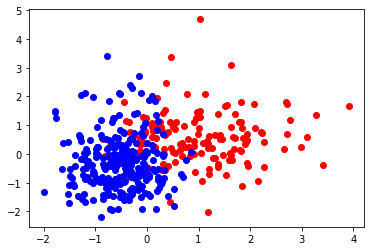

In [7]:
#plot data with different colours for different classes
plt.scatter(X_train_0[:,0], X_train_0[:,1], color = 'red')
plt.scatter(X_train_1[:,0], X_train_1[:,1], color = 'blue')
plt.show()

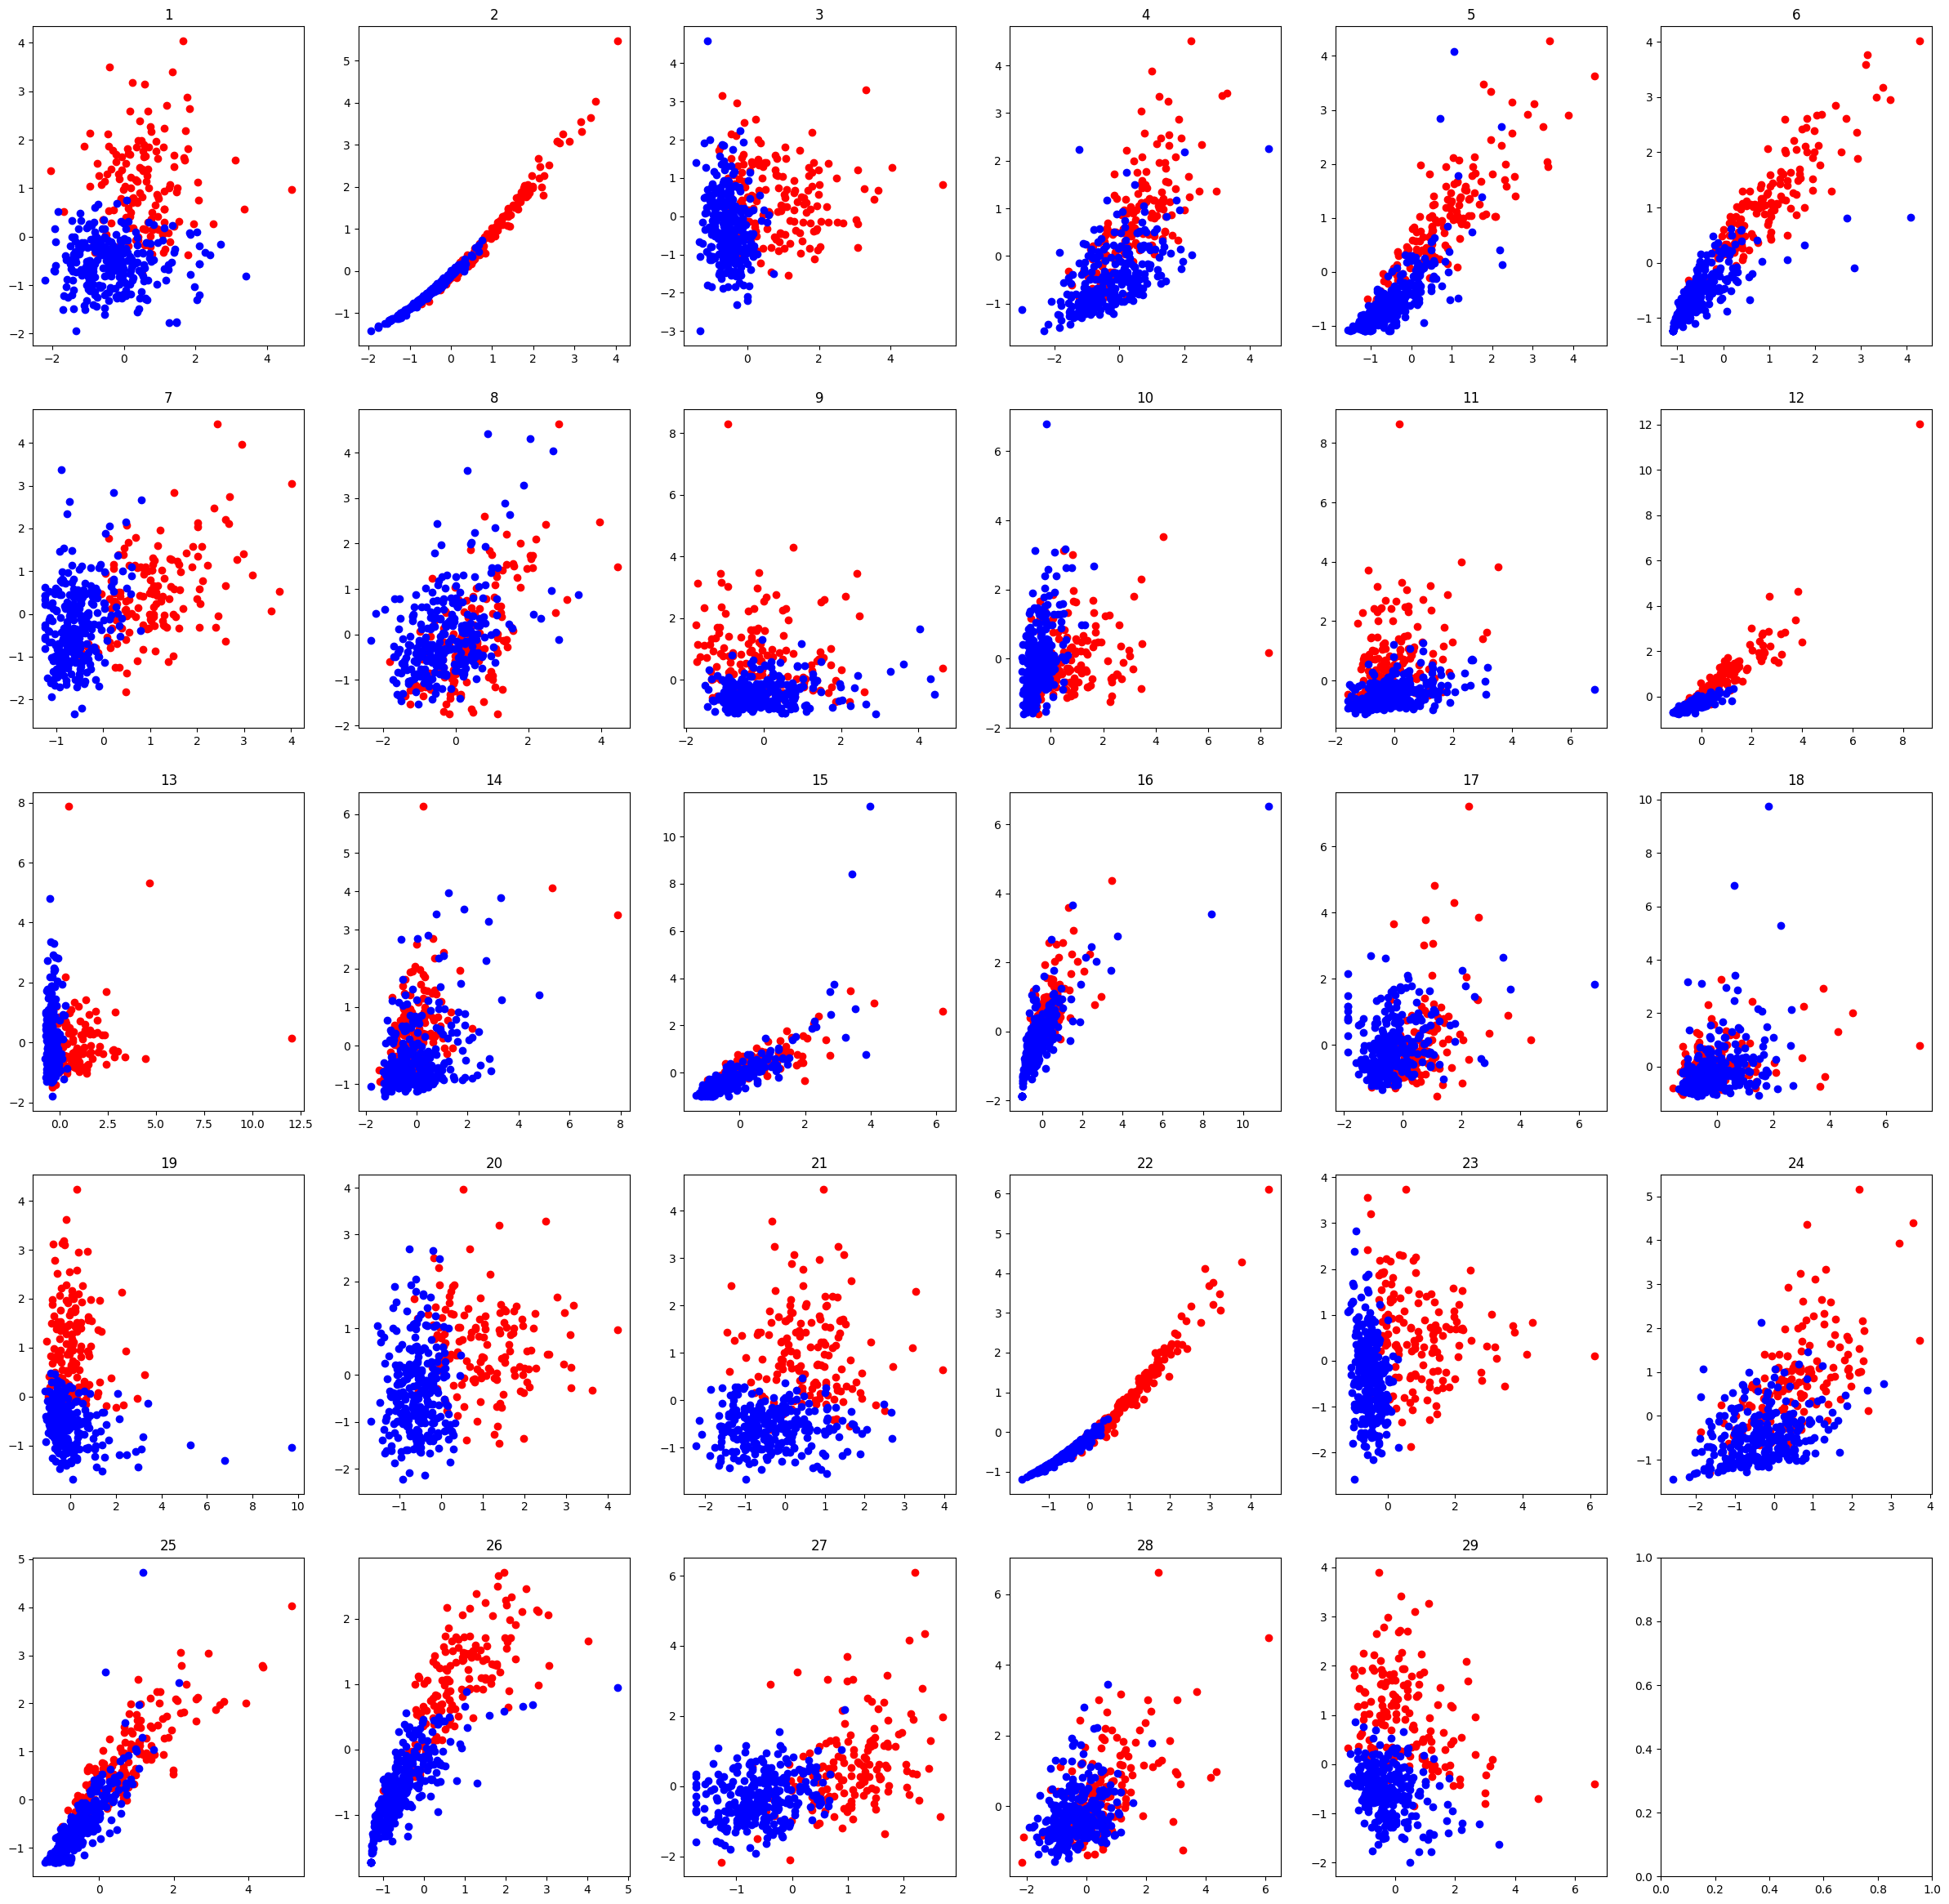

In [8]:
#plot data with different colours for different classes
from matplotlib.pyplot import figure
figure(figsize=(30, 30), dpi=100)
for i in range(0,30):
  try:
    plt.scatter(X_train_0[:,i], X_train_0[:,i+1], color = 'red')
    plt.scatter(X_train_1[:,i], X_train_1[:,i+1], color = 'blue')
  except:
    None
  if(i==29):
    plt.scatter(X_train_0[:,i], X_train_0[:,0], color = 'red')
    plt.scatter(X_train_1[:,i], X_train_1[:,0], color = 'blue')
  plt.title('{}'.format(i))
  #plt.xlabel('petal length')
  #plt.ylabel('petal width')
  plt.subplot(5,6,i+1)
  #plt.savefig('iris.png')
plt.show()

In [9]:
N=n1+n
X_train_2class = np.zeros((N,30))
t_train_2class = np.zeros(N)
X_train_2class = np.concatenate((X_train_1,X_train_0), axis=0)
t_train_2class = np.concatenate((t_train_1,t_train_0), axis=0)
print(X_train_2class.shape)
print(t_train_2class.shape)

(426, 30)
(426,)


In [10]:
M=nn1+nn
X_valid_2class = np.zeros((M,30))
t_valid_2class = np.zeros(M)
X_valid_2class = np.concatenate((X_test_1,X_test_0), axis=0)
t_valid_2class = np.concatenate((t_test_1,t_test_0), axis=0)
print(X_valid_2class.shape)
print(t_valid_2class.shape)

(143, 30)
(143,)


In [11]:
#Logistic Regression

In [12]:
#training with gradient descent

X1_train_2class = X_train

X1_valid_2class = X_test
t_train_2class = t_train
t_valid_2class = t_test
w = np.arange(30)
gr = np.zeros(30)
z = np.zeros(N)
z_v = np.zeros(N)
y = np.zeros(N)
y_v = np.zeros(M)
IT = 8000 # number of iterations of GD
y2 = []
y3 = []
cost = np.zeros(IT)
cost_valid = np.zeros(IT)
alpha = 0.1 # learning rate
for n in range(IT):
    #compute gradient 
    z = np.dot(X1_train_2class,w)
    z_v = np.dot(X1_valid_2class,w)
    y  = 1/(1 + np.exp(-z))
    y2.append(y)
    y_v  = 1/(1 + np.exp(-z_v))
    y3.append(y_v)
    diff = y -  t_train_2class
    gr = np.dot(X1_train_2class.T,diff)/N # gradient
    # update w
    w = w - alpha * gr
    # compute the current cost on the training set
    for i in range(N):
        cost[n] += t_train_2class[i] * np.logaddexp(0,-z[i]) + (1-t_train_2class[i]) * np.logaddexp(0,z[i])
    cost[n] /= N
    # compute the current cost on the validation set
    for i in range(M):
        cost_valid[n] += t_valid_2class[i] * np.logaddexp(0,-z_v[i]) + (1-t_valid_2class[i]) * np.logaddexp(0,z_v[i])
    cost_valid[n] /= M
print(w)

[ -8.3809559  -12.49723689  -6.94063418  -8.3741053   -4.19599451
  -4.77840733 -15.71573887 -11.01825215  -5.12208855   1.92568739
  -9.47949465   5.23786594  -5.85724899  -4.97243309  -2.21853654
   2.58766813   2.33330882   4.66619231   5.27884032   8.57194786
   2.31515068  -2.64245045   4.19624586   3.72456377  -3.7989735
   1.55869951  -3.00141554   1.70219699  -6.73983266   3.38660982]


In [13]:
y2=np.array(y2)
y3=np.array(y3)

Text(0.5, 0, 'iteration number')

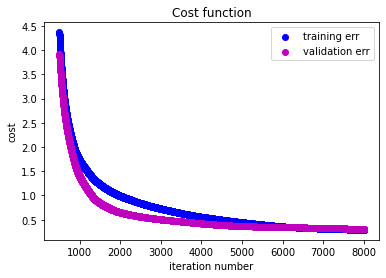

In [14]:
#plotting the learning curves
init = 500
lin = np.linspace(init+1,IT,IT-init)
plt.scatter(lin, cost[init:], color = 'blue', label='training err')
plt.scatter(lin, cost_valid[init:], color = 'm', label='validation err')
plt.title('Cost function')
plt.legend()
plt.ylabel('cost')
plt.xlabel('iteration number')

In [15]:
w.shape

(30,)

In [16]:
#roc

In [17]:
z = np.matmul(X_test,w.T)
c = np.ones(z.shape[0])
z1 = np.sort(z)
#print(z1)
precision=[]
recall=[]

roc_tpr=[]
roc_fpr=[]
err_lis=[]
f1=0
err=0
for j in range(z1.shape[0]):
  for i in range(z1.shape[0]):
    if z[i]<z1[j]:
      c[i]=0
  tp=0
  fp=0
  fn=0
  tn=0
  for k in range(c.shape[0]):
    if(c[k]==t_test[k]):
      if(c[k]==0):
        tn+=1
      else:
        tp+=1
    else:
      if(c[k]==0 and t_test[k]==1):
        fn+=1
      elif(c[k]==1 and t_test[k]==0):
        fp+=1
  err = (fp+fn)/(tn+tp+fn+fp)
  #print(tp,fp,fn,tn)
  #print(c)
  #print(t_test)
  precision.append((tp/(tp + fp)))
  recall.append((tp/(tp + fn)))
  roc_tpr.append((tp/(tp + fn)))
  roc_fpr.append((fp/(fp + tn))) #1-specificity
  err_lis.append(err)

f1 = 2*(np.average(precision)*np.average(recall)/(np.average(precision)+np.average(recall)))
print("Misclassification Rate: ",np.average(err_lis))
print("F1 score is: ",f1)

Misclassification Rate:  0.25443786982248523
F1 score is:  0.7945044101823662


Text(0, 0.5, 'True Positive Rate')

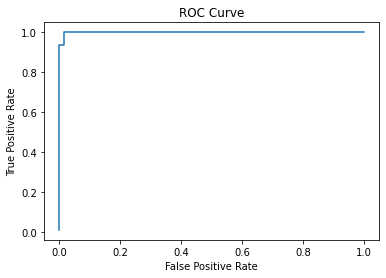

In [18]:
plt.plot(roc_fpr,roc_tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [19]:
#in-built functions for Logistic regression

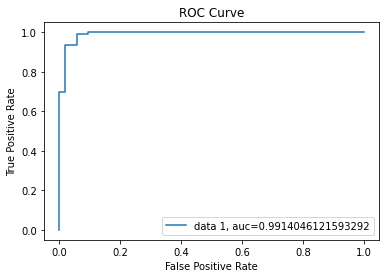

Misclassification Rate:  0.04195804195804196
F1 Score :  0.9550314465408805


In [20]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,t,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

y_pred=logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
err=0
for i in range(y_pred.shape[0]):
  if(y_pred[i]!=y_test[i]):
    err+=1
print("Misclassification Rate: ",err/y_pred.shape[0])
print("F1 Score : ", f1_score(y_test, y_pred, average='macro'))

In [21]:
#kNN Classifier

In [22]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,t,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
M = len(X_test)
N = len(X_train)
D = len(X_train[0])

In [24]:
# compute predictions for all validation points  diff[j,i,d]
# step 1: compute distances between each valid point and each training point
diff3D = np.zeros((M, N, D)) #diff3D[j,i] = X_train[i] - X_valid[j]
for j in range(M):
    diff3D[j] = X_train - X_test[j]
dist_valid = np.linalg.norm( diff3D, axis = 2 ) #computes the norm of each vector diff3D[j,i]
print(dist_valid.shape) # dist_valid[j,i] is the norm of X_train[i] - X_valid[j] (dist between jth valid point and ith training point
print(dist_valid[:2,:2])

(143, 426)
[[6.35970368 8.20141973]
 [3.12370748 5.66528648]]


In [25]:
# sorting
bv = np.argsort(dist_valid, axis = 1) # dist_valid[j, b[j,i]] is the ith element in the sorted dist_valid[j]
print(bv[3,10]) 
print(np.shape(bv))

163
(143, 426)


In [26]:
def reg(X,t):
    A = np.matmul(X.T,X)
    B = np.linalg.pinv(A)
    C = np.matmul(X.T,t)
    w = np.matmul(B,C)
    return w

In [27]:
def rmse(Y,t,N):
  diff_train = np.subtract(Y,t)
  err_train = np.dot(diff_train.T,diff_train)/N
  RMSE_train = np.sqrt(err_train)
  return RMSE_train

In [28]:
N = len(X_train)
#K=5 for k-fold
KF=5
M1 = int(N/KF)

In [29]:
#K=5 for k-fold
def KFOLD(X_train,t_train):
  from sklearn.model_selection import KFold
  kf = KFold(n_splits=K, shuffle=True, random_state=np.random.seed(4867))
  
  for train_index, test_index in kf.split(X_train,t_train):
    X_trainF, X_testF = X_train[train_index], X_train[test_index]
    y_trainF, y_testF = t_train[train_index], t_train[test_index]
  
  X_trainF1 = X_trainF[:M1]
  X_trainF2 = X_trainF[M1:(M1*2)]
  X_trainF3 = X_trainF[(M1*2):(M1*3)]
  X_trainF4 = X_trainF[(M1*3):(M1*4)]
  X_trainF5 = X_trainF[(M1*4):]
  x = np.array([X_trainF1,X_trainF2,X_trainF3,X_trainF4,X_trainF5])
  
  t_trainF1 = y_trainF[:M1]
  t_trainF2 = y_trainF[M1:(M1*2)]
  t_trainF3 = y_trainF[(M1*2):(M1*3)]
  t_trainF4 = y_trainF[(M1*3):(M1*4)]
  t_trainF5 = y_trainF[(M1*4):]
  t = np.array([t_trainF1,t_trainF2,t_trainF3,t_trainF4,t_trainF5])
  
  
  return [x,t]

In [30]:
# compute the predictions to all validation points
M = len(X_test)
K = 10
err_valid = []
y_valid = np.zeros(M)
errv = np.zeros(M)
err_cl=[]
cl=[]
f=0
cv_sc=[]

f1_lis=[]
tn = 0
tp = 0
fn = 0
fp = 0
for k in range(1,K,2):  #K=1,3,5,7,9
  precision=[]
  recall=[]           
  for j in range(M):    
    y_valid[j]=max(t_train[bv[j,:k]])

  err=0
  c=0
  for d in range(y_valid.shape[0]):
    if y_valid[d]==t_test[d]:
      err=0
    else:
      err=1
      c+=1 #misclassified error counter

  err_cl.append(c)

  [x1,t1] = KFOLD(X_train,t_train)
  w1 = reg(x1[f],t1[f])
  y1 = np.matmul(x1[f],w1.T)
  scr = rmse(y1,t_train[:y1.shape[0]],y1.shape[0])
  cv_sc.append(1-(np.sqrt(scr)/K))
  f+=1

  for l in range(y_valid.shape[0]):
    if(y_valid[l]==t_test[l]):
      if(y_valid[l]==0):
        tn+=1
      else:
        tp+=1
    else:
      if(y_valid[l]==0 and t_test[l]==1):
        fn+=1
      elif(y_valid[l]==1 and t_test[l]==0):
        fp+=1

  precision.append((tp/(tp + fp)))
  recall.append((tp/(tp + fn)))

  f1 = 2*(np.average(precision)*np.average(recall))/(np.average(precision)+np.average(recall))
  f1_lis.append(f1)

for i in range(len(err_cl)):
  err_cl[i] /= y_valid.shape[0]*k


print("5-fold Cross-Validation scores: ", cv_sc)

ind = cv_sc.index(max(cv_sc))
#converting index of the list into the respective K value
ind_K = ind*2 + 1
K_err_cl = err_cl[ind]
K_f1_lis = f1_lis[ind]
print("We can deduce that K = {}".format(ind_K))

5-fold Cross-Validation scores:  [0.9127712366120462, 0.9126533365488141, 0.9101185894540453, 0.9130373289945443, 0.9135844640626858]
We can deduce that K = 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Text(0, 0.5, 'Cross-validation Score')

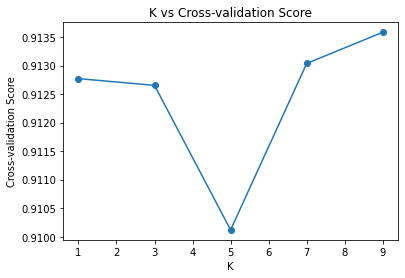

In [31]:
k_array = np.arange(1,K,2)
plt.plot(k_array, cv_sc,'o-')
plt.title("K vs Cross-validation Score")
plt.xlabel("K")
plt.ylabel("Cross-validation Score")

In [32]:
KF_CV_KNN=9
M = len(X_test)
y_valid = np.zeros(M)
for j in range(M):    
    try:y_valid[j]=max(t_test[bv[j,:KF_CV_KNN]])
    except:None

c=0
for d in range(y_valid.shape[0]):
  if y_valid[d]==t_test[d]:
    err=0
  else:
    err=1
    c+=1 #misclassified error counter
err_cl.append(c/y_valid.shape[0]/K)
finish_err_cl = err_cl.reverse()
print("Misclassification Rate: ",K_err_cl)
print("F1 score is: ",K_f1_lis)

Misclassification Rate:  0.048174048174048176
F1 score is:  0.7063267233238906


Text(0, 0.5, 'Misclassification Rate')

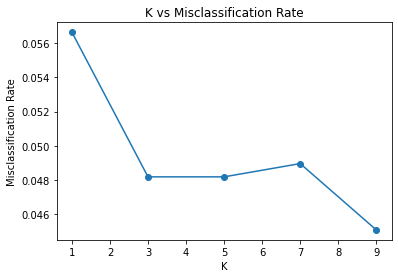

In [33]:
k_array = np.arange(1,K,2)
plt.plot(k_array, err_cl[:len(k_array)],'o-')
plt.title("K vs Misclassification Rate")
plt.xlabel("K")
plt.ylabel("Misclassification Rate")

In [34]:
#in-built functions for kNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
X, t = load_breast_cancer(return_X_y=True)
X_train,X_test,t_train,t_test=train_test_split(X,t,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 5 fold cross validation
for k in range(1, 10, 2):
	neighbors.append(k)
	knn = KNeighborsClassifier(n_neighbors = k)
	scores = cross_val_score(
		knn, X_train, t_train, cv = 5, scoring = 'accuracy')
	cv_scores.append(scores.mean())
print("Cross validation scores: ", cv_scores)
#k=9 is the optimal solution, hence choosing the latest knn
knn.fit(X_train, t_train)
y_pred_knn = knn.predict(X_test)

Cross validation scores:  [0.9459644322845419, 0.9601094391244871, 0.9624897400820794, 0.9601367989056089, 0.9625170998632011]


The optimal number of neighbors is  9 


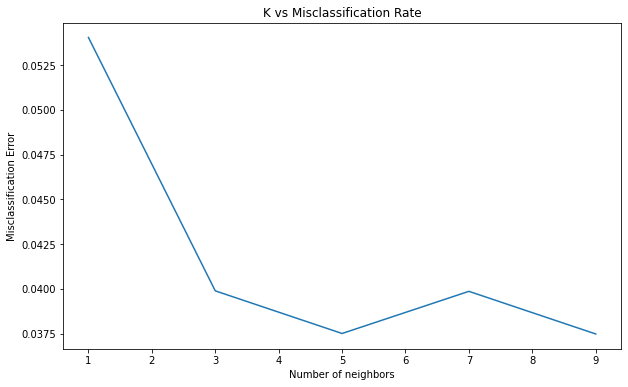

Misclassification Rate:  0.04895104895104895
F1 Score :  0.9468937344156189


In [38]:
from sklearn.metrics import f1_score
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.title("K vs Misclassification Rate")
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()
for i in range(y_pred_knn.shape[0]):
  if(y_pred_knn[i]!=y_test[i]):
    err+=1
print("Misclassification Rate: ",err/y_pred_knn.shape[0])
print("F1 Score : ", f1_score(t_test, y_pred_knn, average='macro'))

In [39]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi